In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('medical-data.csv') 

In [4]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [5]:
df['bmi'] = df['weight'] / ((df['height']/100)**2)

In [6]:
df['Overweight']=1

In [7]:
df.loc[df['bmi']< 25, 'Overweight']=0

In [8]:
df.loc[df['cholesterol']==1 , 'cholesterol'] = 0

In [9]:
df.loc[df['cholesterol']>1 , 'cholesterol'] = 1

In [10]:
df.loc[df['gluc']==1 , 'gluc'] = 0

In [11]:
df.loc[df['gluc']>1 , 'gluc'] = 1

In [12]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,Overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.927438,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,50.472681,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,31.353579,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,27.099251,1


In [13]:
drp = df.drop(columns = ['id','age','sex','height','weight','ap_lo','ap_hi','bmi'])

In [14]:
val_0 = drp.loc[df['cardio']==0] 

In [15]:
melted_df0 = pd.melt(val_0 , value_vars =['active', 'alco', 'cholesterol', 'gluc', 'Overweight', 'smoke'],
                    var_name='Variables', value_name='Binary Value')

In [16]:
val_1 = drp.loc[df['cardio']==1] 

In [17]:
melted_df1 = pd.melt(val_1 , value_vars = ['active', 'alco', 'cholesterol', 'gluc', 'Overweight', 'smoke'],
                    var_name='Variables', value_name='Binary Value')

In [18]:
def plot0():
    plotting = sns.catplot(data=melted_df0 , x = 'Variables', hue = 'Binary Value' , kind='count', height = 4, aspect = 2)
    #plotting.set_axis_labels('Variables','Total') seaborn syntax for labelling x,y coord
    plt.xlabel('Variable')
    plt.ylabel('Total')
    plt.title('Cardio = 0')
    # plotting.legend(title="Binary Value", labels=["0", "1"])
    plt.savefig('plot0')
    plt.show()
    

In [19]:
def plot1():
    plotting = sns.catplot(data=melted_df1 , x = 'Variables', hue = 'Binary Value' , kind='count', height = 4, aspect = 2)
    #plotting.set_axis_labels('Variables','Total') seaborn syntax for labelling x,y coord
    plt.xlabel('Variable')
    plt.ylabel('Total')
    plt.title('Cardio = 1')
    # plotting.legend(title="Binary Value", labels=["0", "1"])
    plt.savefig('plot1')
    plt.show()
    

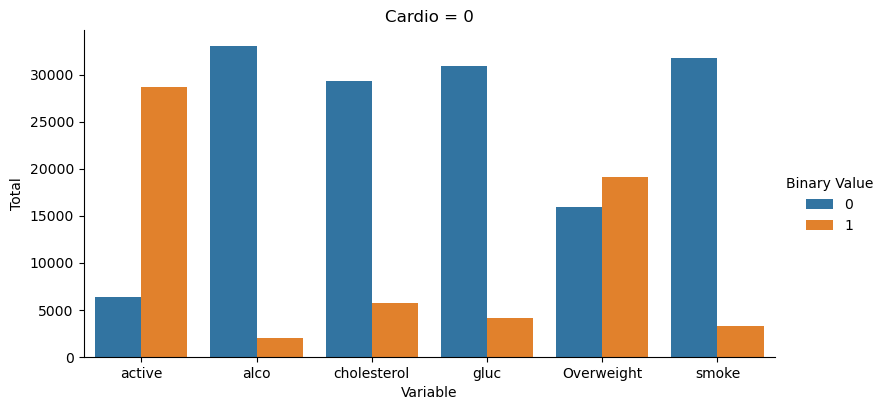

-------------------------------------------------------------------------------------------------------------------


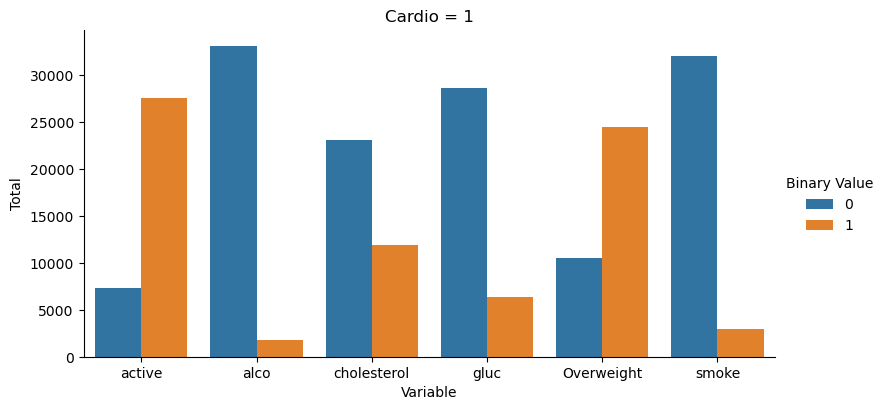

In [20]:
plot0()
print('-'*115)
plot1()

In [21]:
# heatmap

In [22]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,Overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.927438,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,50.472681,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,31.353579,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,27.099251,1


In [23]:
df = df.loc[(df['ap_lo'] <= df['ap_hi'])]

In [24]:
df = df.loc[(df['height'] >= df['height'].quantile(0.025))]    # Height is less than 2.5th percentile

In [25]:
df = df.loc[(df['height'] <= df['height'].quantile(0.975))]    # Height is more than 97.5th percentile

In [26]:
df = df.loc[(df['weight'] >= df['weight'].quantile(0.025))]    # Weight is less than 2.5th percentile

In [27]:
df = df.loc[(df['weight'] <= df['weight'].quantile(0.975))]    # Weight is more than 97.5th percentile

In [28]:
len(df) # After filtering

62784

In [29]:
# df's data will be used to plot a correlation matrix using heatmap

In [30]:
drop_bmi = df.drop(columns = ['bmi'])

In [34]:
data = round(drop_bmi.corr(),1)    # creating a correlation matrix

In [35]:
data

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Overweight
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0
age,0.0,1.0,-0.0,-0.1,0.1,0.0,0.2,0.1,0.1,-0.0,-0.0,-0.0,0.2,0.1
sex,0.0,-0.0,1.0,0.5,0.1,0.0,0.1,-0.0,-0.0,0.3,0.2,0.0,0.0,-0.1
height,0.0,-0.1,0.5,1.0,0.2,0.0,0.0,-0.1,-0.0,0.2,0.1,-0.0,-0.0,-0.2
weight,0.0,0.1,0.1,0.2,1.0,0.0,0.2,0.1,0.1,0.1,0.1,-0.0,0.2,0.7
ap_hi,0.0,0.0,0.0,0.0,0.0,1.0,0.1,0.0,0.0,-0.0,0.0,-0.0,0.1,0.0
ap_lo,0.0,0.2,0.1,0.0,0.2,0.1,1.0,0.1,0.1,0.0,0.0,0.0,0.3,0.2
cholesterol,0.0,0.1,-0.0,-0.1,0.1,0.0,0.1,1.0,0.4,0.0,0.0,0.0,0.2,0.1
gluc,0.0,0.1,-0.0,-0.0,0.1,0.0,0.1,0.4,1.0,-0.0,0.0,-0.0,0.1,0.1
smoke,-0.0,-0.0,0.3,0.2,0.1,-0.0,0.0,0.0,-0.0,1.0,0.3,0.0,-0.0,-0.0


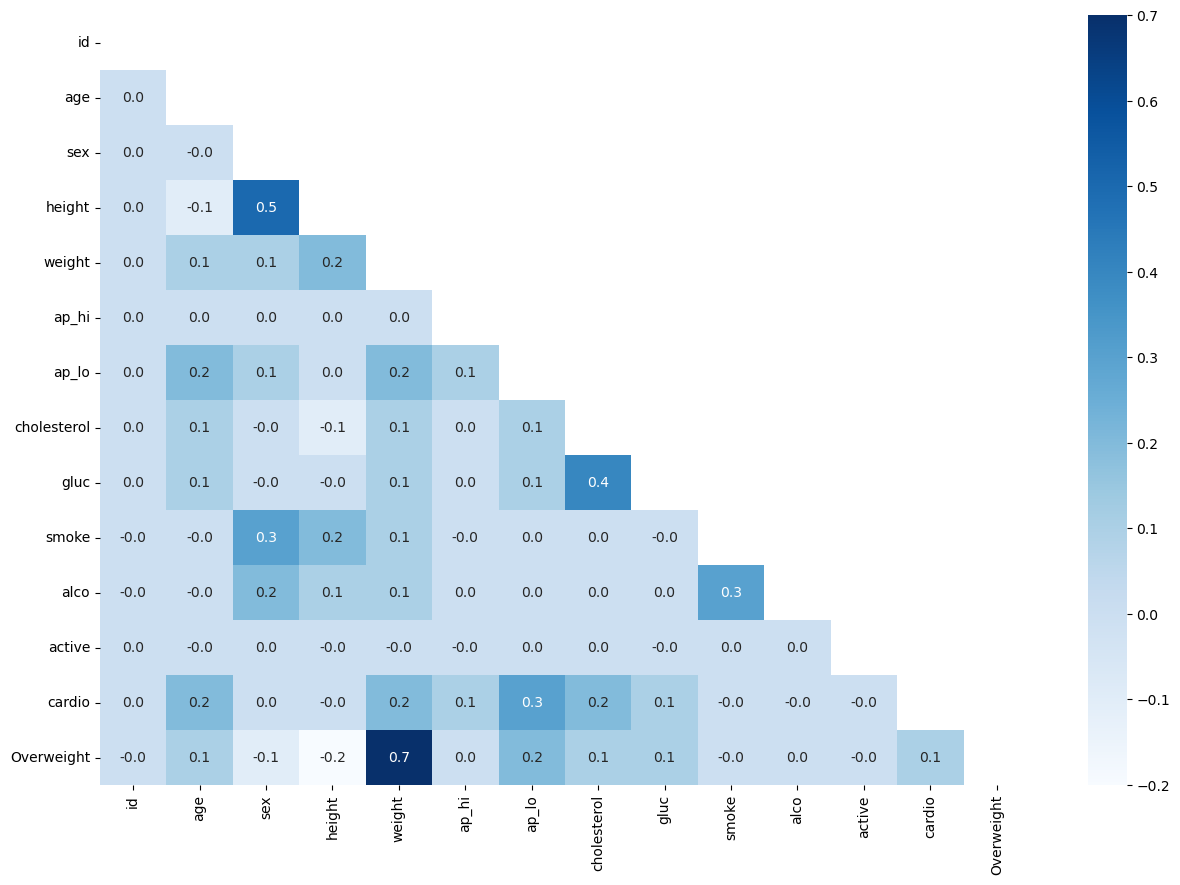

In [36]:
plt.subplots(figsize=(15,10))
mask = np.triu(np.ones_like(data, dtype=bool))
sns.heatmap(data=data, mask=mask, annot=True, fmt='.1f', cmap='Blues')
plt.xticks(rotation=90)
plt.savefig('Heatmap')
plt.show()